In [1]:
import os
import pandas as pd

# Define the root directory containing the folders
root_dir = r'D:\Journal_paper_check\Finalls _full_updated\Clean_2D_data'


# Loop through each subdirectory in the root directory
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        # Check if the file is not a .txt file
        if not file.endswith('.txt'):
            file_path = os.path.join(subdir, file)
            print(file_path)



D:\Journal_paper_check\Finalls _full_updated\Clean_2D_data\sac105\FCGB1\FCGB1_masked.png
D:\Journal_paper_check\Finalls _full_updated\Clean_2D_data\sac105\FCGB2\FCGB2_masked.png
D:\Journal_paper_check\Finalls _full_updated\Clean_2D_data\sac105\FCGB3\FCGB3_masked.png
D:\Journal_paper_check\Finalls _full_updated\Clean_2D_data\sac105\FCSP2\FCSP2_masked.png
D:\Journal_paper_check\Finalls _full_updated\Clean_2D_data\sac105\FCSP3\FCSP3_masked.png
D:\Journal_paper_check\Finalls _full_updated\Clean_2D_data\sac105\FCSP4\FCSP4_masked.png
D:\Journal_paper_check\Finalls _full_updated\Clean_2D_data\sac105\VTF2\VTF2_masked.png
D:\Journal_paper_check\Finalls _full_updated\Clean_2D_data\sac305\FCGB1\FCGB1_masked.png
D:\Journal_paper_check\Finalls _full_updated\Clean_2D_data\sac305\FCGB2\FCGB2_masked.png
D:\Journal_paper_check\Finalls _full_updated\Clean_2D_data\sac305\FCGB3\FCGB3_masked.png
D:\Journal_paper_check\Finalls _full_updated\Clean_2D_data\sac305\FCSP2\FCSP2_masked.png
D:\Journal_paper_check\

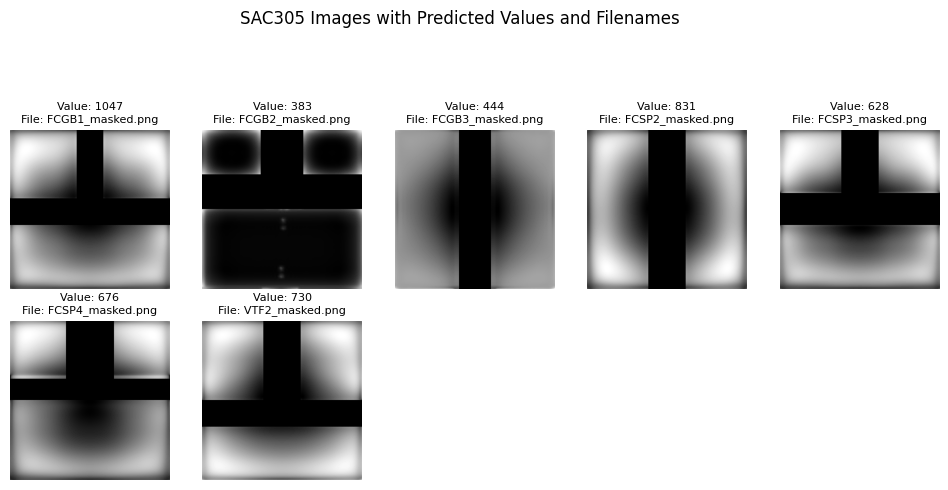

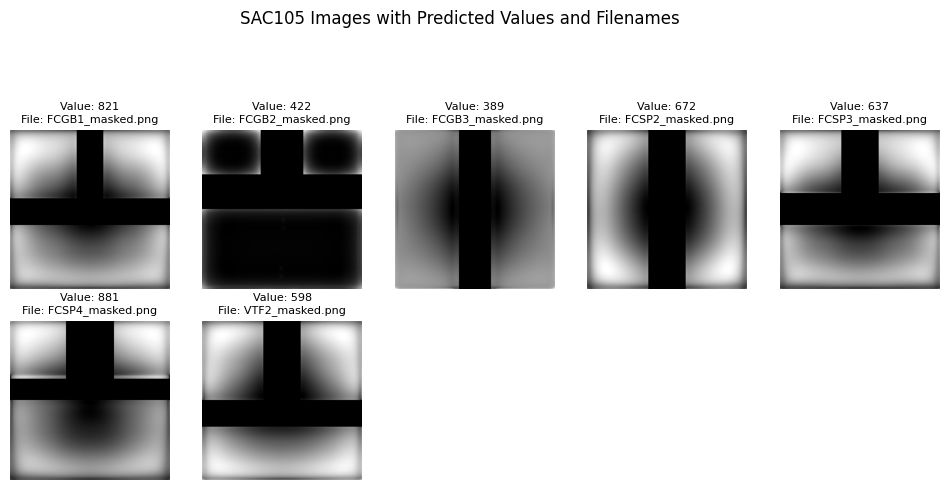

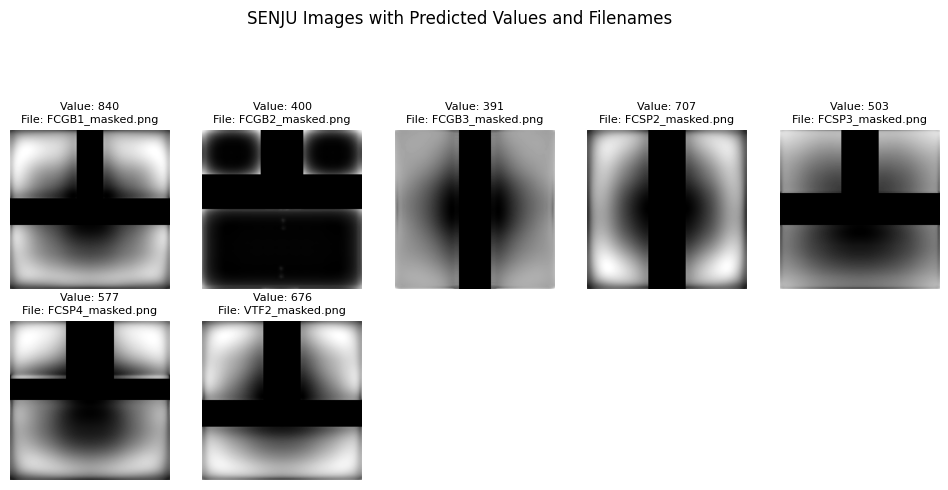

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load and resize images from subfolder
def load_and_resize_images_from_subfolder(subfolder_path, target_size=(300, 300)):
    images = []
    filenames = []
    for file in os.listdir(subfolder_path):
        if file.endswith('.jpg') or file.endswith('.png'):
            image_path = os.path.join(subfolder_path, file)
            # Read and resize the image
            image = cv2.imread(image_path, 0)
            image = cv2.resize(image, target_size)  # Resize to target size
            # Set all pixel values of 255 to 0
            image[image == 255] = 0
            images.append(image)
            filenames.append(file)  # Store the filename
    return images, filenames

# Define the root directory containing the folders
root_dir = r'D:\Journal_paper_check\Finalls _full_updated\Clean_2D_data'

# Prediction values for each solder type
prediction_values_305 = {
    "FCSP2": 831, "FCSP3": 628, "FCGB1": 1047,
    "FCGB2": 383, "FCGB3": 444, "VTF2": 730, "FCSP4": 676
}

prediction_values_105 = {
    "FCSP2": 672, "FCSP3": 637, "FCGB1": 821,
    "FCGB2": 422, "FCGB3": 389, "VTF2": 598, "FCSP4": 881
}


prediction_values_senju = {
    "FCSP2": 707, "FCSP3": 503, "FCGB1": 840,
    "FCGB2": 400, "FCGB3": 391, "VTF2": 676, "FCSP4": 577
}

# Prepare input datasets for all solder types
X_train_all = {"sac305": [], "sac105": [],  "senju": []}
Y_train_all = {"sac305": [], "sac105": [], "senju": []}
filenames_all = {"sac305": [], "sac105": [],  "senju": []}

# Iterate over each main folder in the root directory
for main_folder in os.listdir(root_dir):
    main_folder_path = os.path.join(root_dir, main_folder)
    if os.path.isdir(main_folder_path):
        parent_folder_name = os.path.basename(main_folder_path).lower()
        # Map to the corresponding prediction dictionary
        if "sac305" in parent_folder_name:
            prediction_dict = prediction_values_305
        elif "sac105" in parent_folder_name:
            prediction_dict = prediction_values_105
        elif "senju" in parent_folder_name:
            prediction_dict = prediction_values_senju
        else:
            continue  # Skip if the folder doesn't match a known type

        # Iterate over each subfolder within the main folder
        for subfolder in os.listdir(main_folder_path):
            subfolder_path = os.path.join(main_folder_path, subfolder)
            if os.path.isdir(subfolder_path):
                # Load and resize images from the subfolder
                subfolder_images, subfolder_filenames = load_and_resize_images_from_subfolder(subfolder_path)
                if len(subfolder_images) > 0:  # Ensure there's at least one image
                    if subfolder in prediction_dict:
                        X_train_all[parent_folder_name].extend(subfolder_images)
                        filenames_all[parent_folder_name].extend(subfolder_filenames)
                        Y_train_all[parent_folder_name].extend([prediction_dict[subfolder]] * len(subfolder_images))

# Function to display images with their predicted values and filenames
def display_images_with_values_and_filenames(images, values, filenames, title):
    plt.figure(figsize=(12, 12))
    for i in range(min(len(images), 25)):  # Limit display to 25 images
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Value: {values[i]}\nFile: {filenames[i]}', fontsize=8)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display images for each solder type
for solder_type in X_train_all.keys():
    if len(X_train_all[solder_type]) > 0:
        display_images_with_values_and_filenames(
            X_train_all[solder_type],
            Y_train_all[solder_type],
            filenames_all[solder_type],
            f'{solder_type.upper()} Images with Predicted Values and Filenames'
        )


In [3]:
# Convert lists to numpy arrays for all solder types
X_train_all_np = {key: np.array(value) for key, value in X_train_all.items()}
Y_train_all_np = {key: np.array(value) for key, value in Y_train_all.items()}

# Ensure the shapes match and print for each solder type
for solder_type in X_train_all_np.keys():
    print(f"Shape of X_train_{solder_type.upper()}: {X_train_all_np[solder_type].shape}")
    print(f"Shape of Y_train_{solder_type.upper()}: {Y_train_all_np[solder_type].shape}")


Shape of X_train_SAC305: (7, 300, 300)
Shape of Y_train_SAC305: (7,)
Shape of X_train_SAC105: (7, 300, 300)
Shape of Y_train_SAC105: (7,)
Shape of X_train_SENJU: (7, 300, 300)
Shape of Y_train_SENJU: (7,)


In [5]:
# Combine X_train from all solder types
X_train_combined = np.concatenate(
    [X_train_all_np[key] for key in X_train_all_np.keys()],
    axis=0
)

# Ensure the shape of the combined dataset
print("Shape of X_train_combined:", X_train_combined.shape)

# Combine Y_train from all solder types
Y_train_combined = np.concatenate(
    [Y_train_all_np[key] for key in Y_train_all_np.keys()],
    axis=0
)

# Normalize Y_train_combined
Y_min = np.min(Y_train_combined)
Y_max = np.max(Y_train_combined)
Y_train_normalized = (Y_train_combined - Y_min) / (Y_max - Y_min)

# Ensure the shape of the combined dataset
print("Shape of Y_train_combined:", Y_train_combined.shape)
print("Shape of Y_train_normalized:", Y_train_normalized.shape)


Shape of X_train_combined: (21, 300, 300)
Shape of Y_train_combined: (21,)
Shape of Y_train_normalized: (21,)


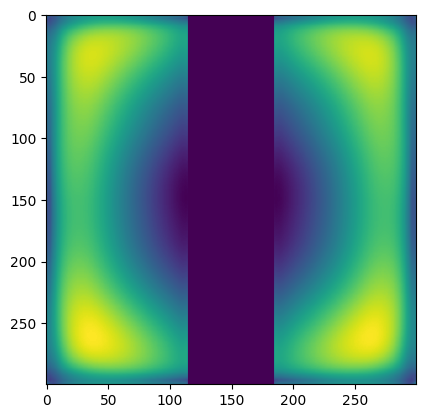

In [6]:
plt.imshow(X_train_combined[3])

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from sklearn.model_selection import LeaveOneOut


# Model 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Rescaling
from tensorflow.keras.models import Model
import numpy as np
import random

# Set the random seeds for reproducibility
reproducible_seed = 42
tf.random.set_seed(reproducible_seed)
np.random.seed(reproducible_seed)
random.seed(reproducible_seed)

# Function to create a model based on the given parameters
def create_model(conv_filters, dense_neurons):
    input_shape = (300, 300, 1)  # Assuming grayscale images
    input_layer = Input(shape=input_shape, name='input_layer')
    rescaled_layer = Rescaling(scale=1.0/255)(input_layer)
    
    # Add convolutional and pooling layers
    x = rescaled_layer
    for filters in conv_filters:
        x = Conv2D(filters, (3, 3), activation='relu')(x)
        x = MaxPooling2D((2, 2))(x)
    
    # Flatten the output of the convolutional layers
    x = Flatten()(x)
    
    # Add dense layers
    x = Dense(dense_neurons, activation='tanh')(x)
    
    # Output layer for regression
    output_layer = Dense(1, activation='linear')(x)
    
    # Create and compile the model
    model = Model(inputs=input_layer, outputs=output_layer)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(optimizer=optimizer, loss='mae')
    
    return model

# Define the configurations for each model
model_configs = [
    {'conv_filters': [1, 2], 'dense_neurons': 2},
    {'conv_filters': [2, 4], 'dense_neurons': 4},
    {'conv_filters': [4, 8], 'dense_neurons': 8},
    {'conv_filters': [4, 8], 'dense_neurons': 16},
    {'conv_filters': [8, 16], 'dense_neurons': 32},
    {'conv_filters': [16, 32], 'dense_neurons': 64},
    {'conv_filters': [32, 32], 'dense_neurons': 64},
    {'conv_filters': [32, 64], 'dense_neurons': 64},
    {'conv_filters': [32, 64], 'dense_neurons': 128},
    {'conv_filters': [64, 64], 'dense_neurons': 128},
    {'conv_filters': [64, 128], 'dense_neurons': 128}
]

# Create and summarize each model
models = []
for i, config in enumerate(model_configs):
    model = create_model(conv_filters=config['conv_filters'], dense_neurons=config['dense_neurons'])
    models.append(model)
    print(f"Model {i+1} Summary:")
    model.summary()
    print("\n")

model_0 = create_model(conv_filters=[1, 2], dense_neurons=2)
model_1 = create_model(conv_filters=[2, 4], dense_neurons=4)
model_2 = create_model(conv_filters=[4, 8], dense_neurons=8)
model_3 = create_model(conv_filters=[4, 8], dense_neurons=16)




Model 1 Summary:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 300, 300, 1)]     0         
                                                                 
 rescaling (Rescaling)       (None, 300, 300, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 1)       10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 1)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 2)       20        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 2)        0         
 2D)                                        

In [10]:
print("Shape of X_train_combined:", X_train_combined.shape)
print("Shape of Y_train_combined:", Y_train_combined.shape)

X_train_combined = X_train_combined.reshape(-1, 300, 300, 1)

Shape of X_train_combined: (21, 300, 300, 1)
Shape of Y_train_combined: (21,)


Fold 1 - Best Validation Loss: 0.0455174446105957
1/1 [==============================] - 0s 100ms/step
Fold 2 - Best Validation Loss: 0.011257627978920937
1/1 [==============================] - 0s 52ms/step
Fold 3 - Best Validation Loss: 0.009502902626991272
1/1 [==============================] - 0s 50ms/step
Fold 4 - Best Validation Loss: 0.00025004148483276367
1/1 [==============================] - 0s 51ms/step
Fold 5 - Best Validation Loss: 0.004896491765975952
1/1 [==============================] - 0s 57ms/step
Fold 6 - Best Validation Loss: 0.0032563209533691406
1/1 [==============================] - 0s 58ms/step
Fold 7 - Best Validation Loss: 0.0062830448150634766
1/1 [==============================] - 0s 53ms/step
Fold 8 - Best Validation Loss: 0.022327542304992676
1/1 [==============================] - 0s 59ms/step
Fold 9 - Best Validation Loss: 0.005821600556373596
1/1 [==============================] - 0s 53ms/step
Fold 10 - Best Validation Loss: 0.012221895158290863
1/1 [===

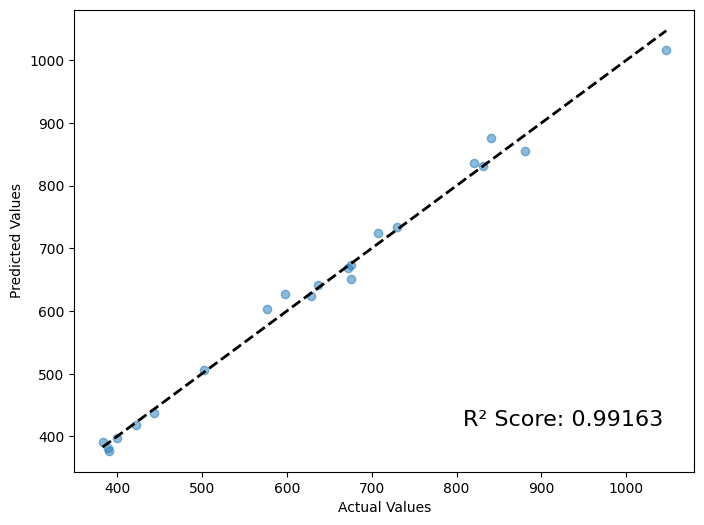

In [11]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Directory to save the models
os.makedirs("saved_models_4", exist_ok=True)

# Initialize Leave-One-Out Cross-Validator
loo = LeaveOneOut()

# Initialize lists to store evaluation results and predictions
val_losses = []
val_predictions = []
actual_values = []

# Loop over each fold
fold = 1
for train_index, val_index in loo.split(X_train_combined):
    # Create a new instance of the model for each fold
    model = create_model(conv_filters=[32, 64], dense_neurons=128)
    
    X_train_part1, X_val_part1 = X_train_combined[train_index], X_train_combined[val_index]
    Y_train, Y_val = Y_train_normalized[train_index], Y_train_normalized[val_index]
    
    best_loss = float('inf')
    best_model_path = f"saved_models_4/model_fold_{fold}.h5"
    
    # Train the model
    for epoch in range(50):
        model.fit([X_train_part1], Y_train, epochs=1, validation_data=([X_val_part1], Y_val), verbose=0, shuffle=True)
        loss = model.evaluate([X_val_part1], Y_val, verbose=0)
        
        # Save the model with the best validation loss
        if loss < best_loss:
            best_loss = loss
            model.save(best_model_path)
    
    val_losses.append(best_loss)
    print(f"Fold {fold} - Best Validation Loss: {best_loss}")
    
    # Load the best model for the fold and predict
    best_model = tf.keras.models.load_model(best_model_path)
    prediction = best_model.predict([X_val_part1]).flatten()
    val_predictions.extend(prediction)
    actual_values.extend(Y_val)
    
    fold += 1

# Calculate average validation loss
avg_val_loss = np.mean(val_losses)
print("Average Validation Loss:", avg_val_loss)

# Reverse normalization for predictions and actual values
Y_min = np.min(Y_train_combined)
Y_max = np.max(Y_train_combined)

val_predictions_original_scale = np.array(val_predictions).flatten() * (Y_max - Y_min) + Y_min
actual_values_original_scale = np.array(actual_values).flatten() * (Y_max - Y_min) + Y_min

# Calculate errors
errors = ((np.abs(actual_values_original_scale - val_predictions_original_scale)) / actual_values_original_scale) * 100 

# Create DataFrame
data = {
    'Actual Values': actual_values_original_scale,
    'Predicted Values': val_predictions_original_scale,
    'Absolute Error': errors
}
results_df = pd.DataFrame(data)

# Display DataFrame
print(results_df.head(28))  # Print first few rows of the DataFrame

# Calculate R² Score
r2 = r2_score(actual_values_original_scale, val_predictions_original_scale)
print("R² Score:", r2)

# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(actual_values_original_scale, val_predictions_original_scale, alpha=0.5)
plt.plot([actual_values_original_scale.min(), actual_values_original_scale.max()], 
         [actual_values_original_scale.min(), actual_values_original_scale.max()], 
         'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.text(0.95, 0.1, f'R² Score: {r2:.5f}', fontsize=16, ha='right', transform=plt.gca().transAxes, backgroundcolor='white')
plt.grid(False)

plt.show()
